# WeatherPy

## Observations:
    - The minimum observed humidity at the equator is higher than values observed at other latitudes.
    - The temperature versus latitude plot has a parabolic shape, indicating that temperature peak at the equator and decrease as latitude diverts from zero.  Also, the plot is not perfectly centered over zero, leading me to believe this is due to the offset of the earth's axis inducing seasonal changes
    - The heavy concentration of points with latitudes greater than 0 degrees indicates that there are a greater number of cities in the northern hemisphere, and it would logically follow that population is also greater than in the southern hemisphere.

In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import seaborn as sns
from citipy import citipy
from random import randrange
import time
from random import uniform

# Generate Cities List

In [2]:
# List to hold cities 
cities = []
# Use varaible c to keep track of unique city names
c=0

# While loop ensures that we get at least 500 unique city names
while c < 500:
    # Loop to generate longitudes, latitudes
    for x in range(0, 50):
        # Generate range longitudes and latitudes
        x_lat = uniform(-90.00, 90.00)
        y_lon = uniform(-180.00, 180.00)
        
        # Import the cities based on the longitude and latitude
        cities.append(citipy.nearest_city(x_lat, y_lon).city_name)
    
    # Create the cities DF
    cities_df = pd.DataFrame(cities)
    
    # Drop duplicate city names
    cities_df = cities_df.drop_duplicates(subset = 0, keep = 'first')
    
    # Count how many cities are in the set
    c = len(cities_df)
# Sample DF    
cities_df.head(5)

,0
0,yumen
1,mayumba
2,albany
3,busselton
4,illoqqortoormiut


In [3]:
# Get number of cities generated
len(cities_df)

504

In [4]:
# Name the columns for the DF
cities_df['humidity'] = ''
cities_df['temp'] = ''
cities_df['wind'] = ''
cities_df['clouds'] = ''
cities_df['press'] = ''
cities_df['name'] = ''
cities_df['lat'] = ''
cities_df['lon'] = ''

cities_df.head(5)

,0,humidity,temp,wind,clouds,press,name,lat,lon
0,yumen,,,,,,,,
1,mayumba,,,,,,,,
2,albany,,,,,,,,
3,busselton,,,,,,,,
4,illoqqortoormiut,,,,,,,,


In [5]:
# Save config information.
api_key = "b63fc0fd1354fd3ad6fba4757309f1f8"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Perform API Calls

In [6]:
counter = 0

# Populate the DF
for index, row in cities_df.iterrows():
    try:
        # Counter keeps track of where we are in record retrieval process
        counter += 1
        # Print progress to keep user updated
        print('Retreieving record ' + str(counter) + ' of ' + str(c))
        # Build the URL query
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (row[0])
        cities_lat_lng = req.get(query_url).json()
        #Populate the DF
        cities_df.set_value(index, "lat", cities_lat_lng["coord"]["lat"])
        cities_df.set_value(index, "lon", cities_lat_lng["coord"]["lon"])
        cities_df.set_value(index, 'press', cities_lat_lng['main']['pressure'])
        cities_df.set_value(index, 'temp', cities_lat_lng['main']['temp_max'])
        cities_df.set_value(index, 'humidity', cities_lat_lng['main']['humidity'])
        cities_df.set_value(index, 'clouds', cities_lat_lng['clouds']['all'])
        cities_df.set_value(index, 'wind', cities_lat_lng['wind']['speed'])
        cities_df.set_value(index, 'name', cities_lat_lng['name'])
    except:
        print('Missing informtion.....skipping')   
    
    print(query_url)
    # Add a delay so we don't get banned from weather API
    time.sleep(1)

Retreieving record 1 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=yumen
Retreieving record 2 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=mayumba
Retreieving record 3 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=albany
Retreieving record 4 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=busselton
Retreieving record 5 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=illoqqortoormiut
Retreieving record 6 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=novyy urgal
Retreieving record 7 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=jamestown
Retreieving r

Retreieving record 60 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=high level
Retreieving record 61 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=khatanga
Retreieving record 62 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=avarua
Retreieving record 63 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=pirovskoye
Retreieving record 64 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=cherskiy
Retreieving record 65 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=natal
Retreieving record 66 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=kawana waters
Retreievi

Retreieving record 118 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=arraial do cabo
Retreieving record 119 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=hami
Retreieving record 120 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=taolanaro
Retreieving record 121 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=vostok
Retreieving record 122 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=kuala terengganu
Retreieving record 123 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=ilulissat
Retreieving record 124 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=geor

Retreieving record 176 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=san angelo
Retreieving record 177 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=taiyuan
Retreieving record 178 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=sentyabrskiy
Retreieving record 179 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=faanui
Retreieving record 180 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=talnakh
Retreieving record 181 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=lorengau
Retreieving record 182 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=sao filipe
Re

Retreieving record 234 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=honningsvag
Retreieving record 235 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=ulladulla
Retreieving record 236 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=aksay
Retreieving record 237 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=dingle
Retreieving record 238 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=hedaru
Retreieving record 239 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=codrington
Retreieving record 240 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=ostrovnoy
Retrei

Retreieving record 292 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=bronnoysund
Retreieving record 293 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=cayenne
Retreieving record 294 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=saskylakh
Retreieving record 295 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=cozumel
Retreieving record 296 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=palmer
Retreieving record 297 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=pitkyaranta
Retreieving record 298 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=erenhot
Retr

Retreieving record 350 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=san patricio
Retreieving record 351 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=severo-kurilsk
Retreieving record 352 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=guadalupe y calvo
Retreieving record 353 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=san quintin
Retreieving record 354 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=shingu
Retreieving record 355 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=upata
Retreieving record 356 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&

Retreieving record 408 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=narsaq
Retreieving record 409 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=nizhnevartovsk
Retreieving record 410 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=manga
Retreieving record 411 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=mariestad
Retreieving record 412 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=zyryanka
Retreieving record 413 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=bani
Retreieving record 414 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=beaverlodge
Retre

Retreieving record 466 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=tommot
Retreieving record 467 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=miri
Retreieving record 468 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=taylorville
Retreieving record 469 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=krabi
Retreieving record 470 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=presidente dutra
Retreieving record 471 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=viedma
Retreieving record 472 of 504
http://api.openweathermap.org/data/2.5/weather?appid=b63fc0fd1354fd3ad6fba4757309f1f8&units=Imperial&q=aklavik
Retreie

In [7]:
cities_df.head(5)


,0,humidity,temp,wind,clouds,press,name,lat,lon
0,yumen,52,58.58,5.41,0,849.58,Yumen,40.28,97.2
1,mayumba,92,75.5,9.44,68,1014.62,Mayumba,-3.43,10.66
2,albany,69,75.2,9.17,75,1012,Albany,42.65,-73.76
3,busselton,100,59.12,17.38,92,1032.37,Busselton,-33.65,115.33
4,illoqqortoormiut,57,78.8,8.05,75,1015,Trevi,41.9,12.49


In [8]:
cities_df.to_csv('weather1.csv', sep=',', encoding='utf-8')

# Latitude Vs Temperature

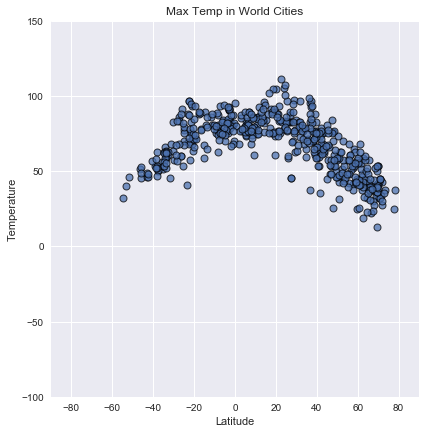

In [9]:
#Temperature (F) vs. Latitude

sns.lmplot(x = 'lat', y = 'temp', data = cities_df, 
           size = 6,  fit_reg = False, scatter_kws = {'edgecolor': 'black', 'linewidth': 1, 'alpha': 0.75}
           )
# Incorporate the other graph properties
plt.title("Max Temp in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.ylim(-100, 150)

plt.grid(True)

# Save the figure
plt.savefig("TempVsLat.png")

# Show plot
plt.show()

# Humidity Vs Latitude

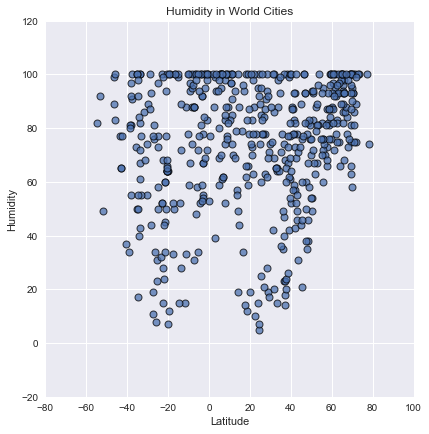

In [10]:
#Humidity (%) vs. Latitude
sns.lmplot(x = 'lat', y = 'humidity', data = cities_df, 
           size = 6, fit_reg = False, scatter_kws = {'edgecolor': 'black', 'linewidth': 1, 'alpha': 0.75}
          )

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.xlabel("Latitude")

plt.grid(True)

# Save the figure
plt.savefig("HumVsLat.png")

# Show plot
plt.show()


# Cloudiness Vs Latitude

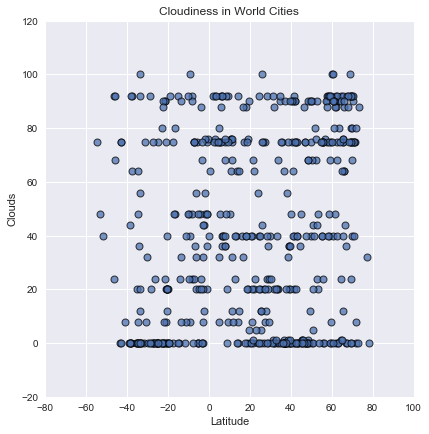

In [11]:
#Cloudiness (%) vs. Latitude
sns.lmplot(x = 'lat', y = 'clouds', data = cities_df, 
           size = 6, fit_reg = False, scatter_kws = {'edgecolor': 'black', 'linewidth': 1, 'alpha': 0.75}
          )

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Clouds")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsVsLat.png")

# Show plot
plt.show()


# Wind Speed Vs Latitude

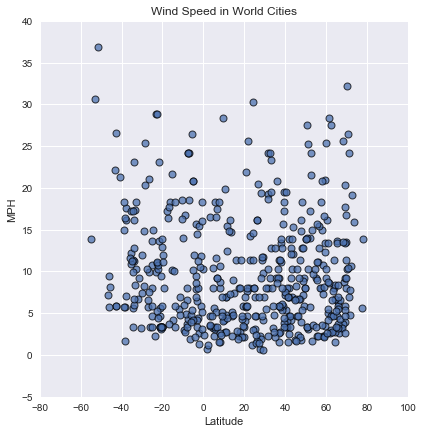

In [12]:
#Wind Speed (mph) vs. Latitude
sns.lmplot(x = 'lat', y = 'wind', data = cities_df, size = 6, fit_reg = False, 
           scatter_kws = {'edgecolor': 'black', 'linewidth': 1, 'alpha': 0.75  ,# 'xlabel': 'MPH'
            })

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.ylabel("MPH")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindVsLat.png")

# Show plot
plt.show()


# Map of the longitudes and latitudes

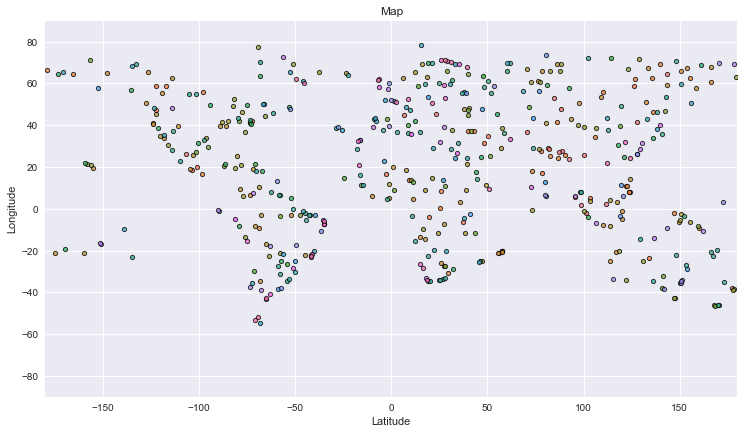

In [13]:
#Map
sns.lmplot(x = 'lon', y = 'lat', data = cities_df, hue = 'wind', legend = False, size = 6, aspect = 1.75, fit_reg = False, 
           scatter_kws = {'edgecolor': 'black', 'linewidth': 1, 'alpha': 0.75, 's': 18,
            })

# Incorporate the other graph properties
plt.title("Map")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Map.png")

# Show plot
#plt.legend()
plt.show()